# KÜTÜPHANE IMPORT

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# CONSTANT


In [2]:
FILENAME = "side_effect_data 1.xlsx"
DATASET_PATH = os.path.join("dataset", FILENAME)

# DOSYA OKUMA


In [3]:
df = pd.read_excel(DATASET_PATH)

# EDA BASLANGIC

In [4]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


# Eksik Veri Kontrolü

In [5]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

# Genetik hastalıkların en çok görülenleri grafikleştirme

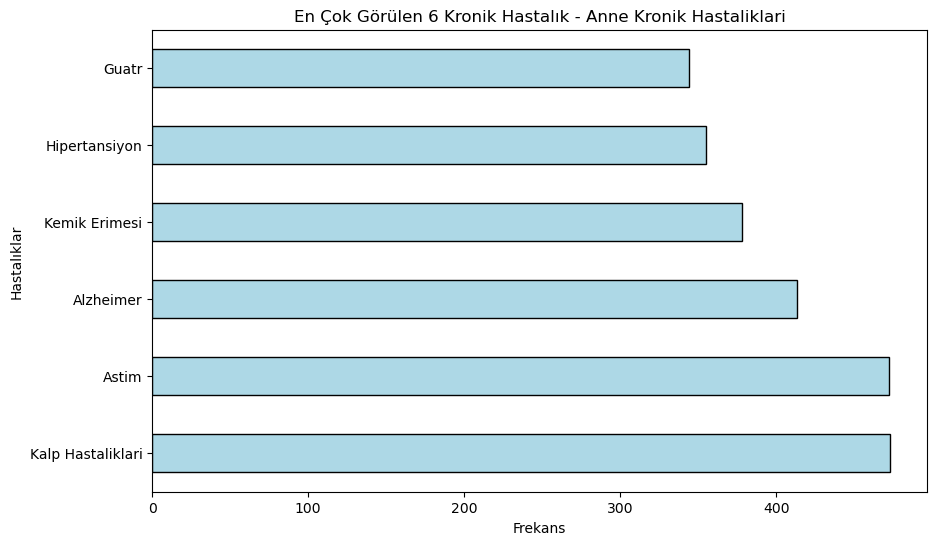

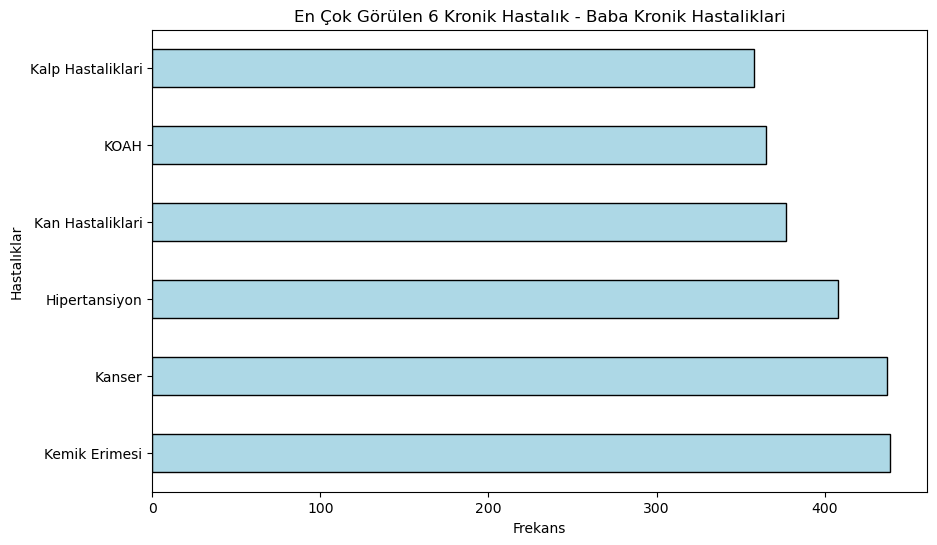

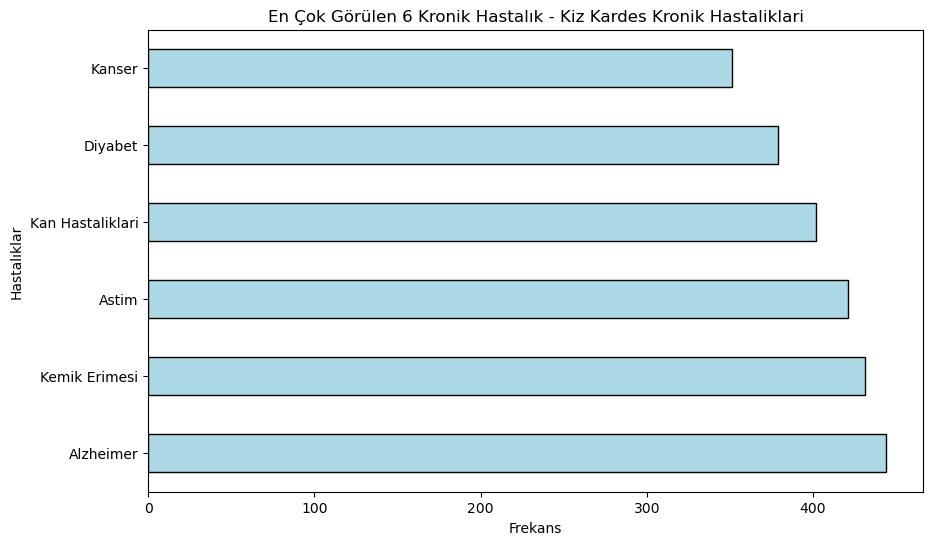

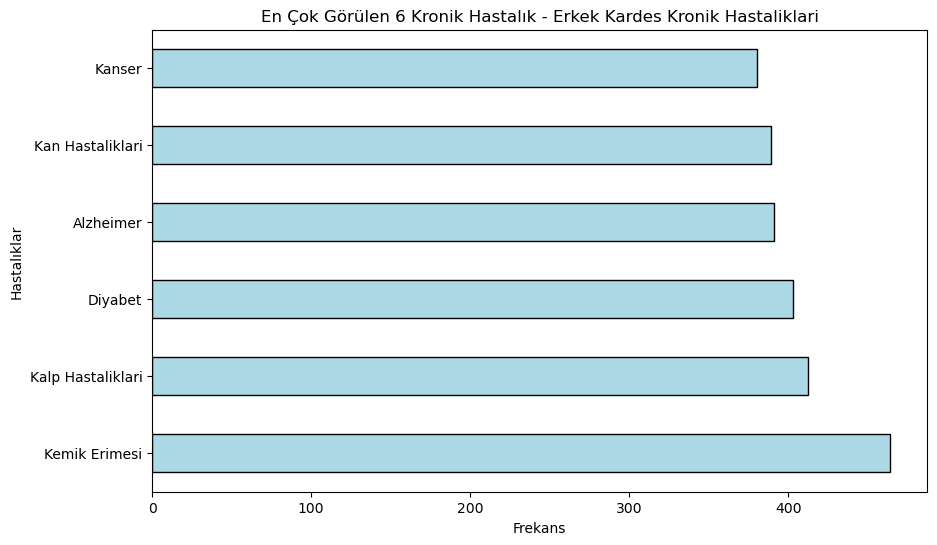

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonksiyon tanımlama
def plot_top_diseases(dataframe, column_name):
    # Hastalıkları virgül ile ayırıp liste haline getir
    diseases = dataframe[column_name].dropna().str.cat(sep=',').split(',')
    diseases = [d.strip() for d in diseases]  # Boşlukları temizle

    # Hastalıkları say
    disease_counts = pd.Series(diseases).value_counts()

    # En çok görülen 6 hastalığı al
    top_diseases = disease_counts.head(6)

    # Grafiği çiz
    plt.figure(figsize=(10, 6))
    top_diseases.plot(kind='barh', color='lightblue', edgecolor='black')
    plt.title(f'En Çok Görülen 6 Kronik Hastalık - {column_name}')
    plt.xlabel('Frekans')
    plt.ylabel('Hastalıklar')
    plt.show()

# Her kolon için grafikleri çiz
columns = ['Anne Kronik Hastaliklari', 'Baba Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari']

for col in columns:
    plot_top_diseases(df, col)


# Boy kilo kümelenmesinin Grafiği

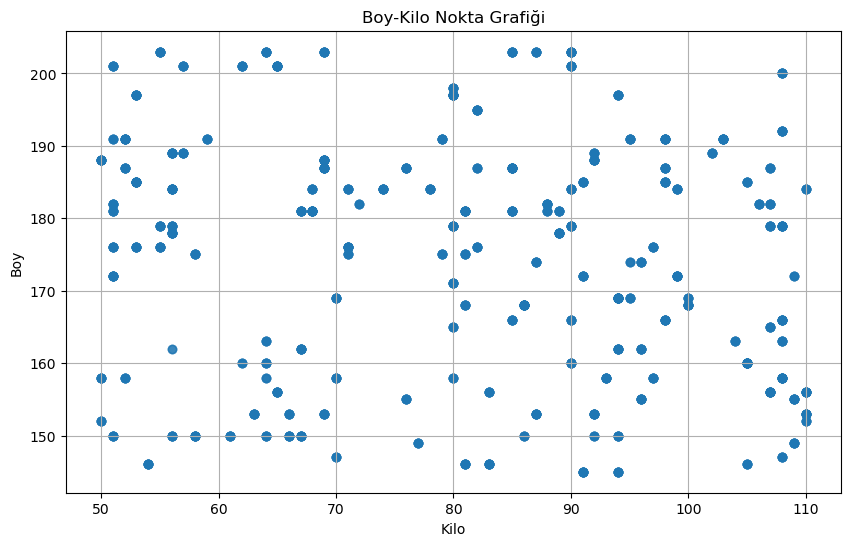

In [7]:
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.5)
    plt.title('Boy-Kilo Nokta Grafiği')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

# Fonksiyonu çağır
scatter_plot(df, 'Kilo', 'Boy')

# İllerin Dağılımı 
Belki bölge bölge dağıtım yapıp iklime göre farklı hastalıklar oluşabildiğinden değerlendirilebilir.

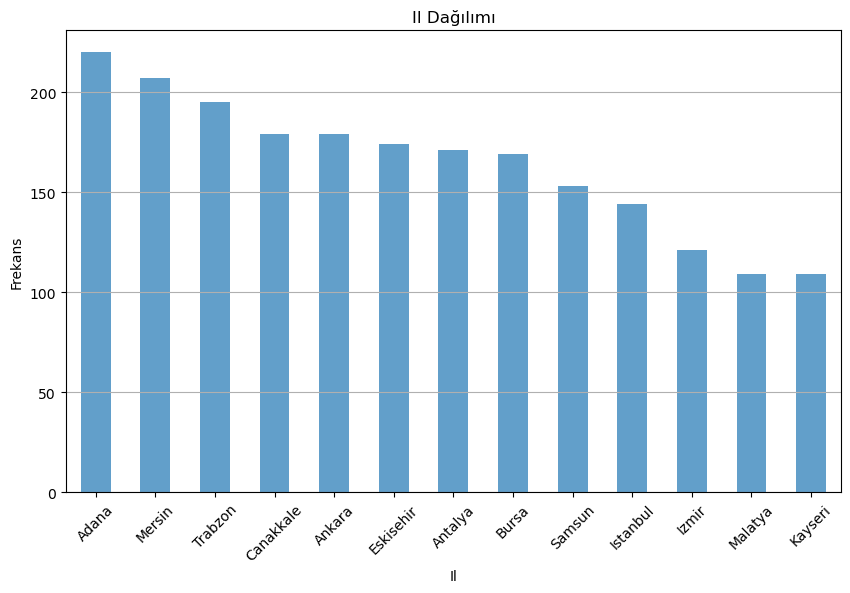

In [8]:
def plot_count_of_columns(df, column_name):
    # Şehirlerin frekansını hesapla
    counts = df[column_name].value_counts()
    
    # Bar grafiği oluştur
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', alpha=0.7)
    plt.title(f'{column_name} Dağılımı')
    plt.xlabel(column_name)
    plt.ylabel('Frekans')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Fonksiyonu çağır
plot_count_of_columns(df, 'Il')

# Yan Etkilerin Saatleri
Genellikle sabah uyanış saatlerinde bir artış mevcut

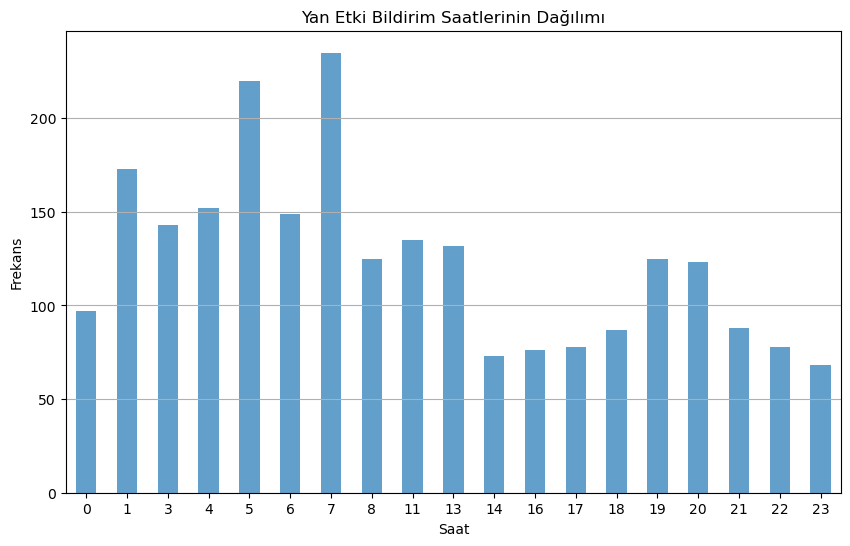

In [9]:
# Yan etki bildirim saatini çıkar
df["Yan_Etki_Bildirim_Saati"] = df["Yan_Etki_Bildirim_Tarihi"].dt.hour

def plot_side_effect_notifications_by_hour(df, column_name):
    # Saatlerin frekansını hesapla
    counts = df[column_name].value_counts().sort_index()
    
    # Bar grafiği oluştur
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', alpha=0.7)
    plt.title('Yan Etki Bildirim Saatlerinin Dağılımı')
    plt.xlabel('Saat')
    plt.ylabel('Frekans')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Fonksiyonu çağır
plot_side_effect_notifications_by_hour(df, "Yan_Etki_Bildirim_Saati")

# Cinsiyet Dağılımı
Bazı hastalıklar cinsiyete özgü olabilir.

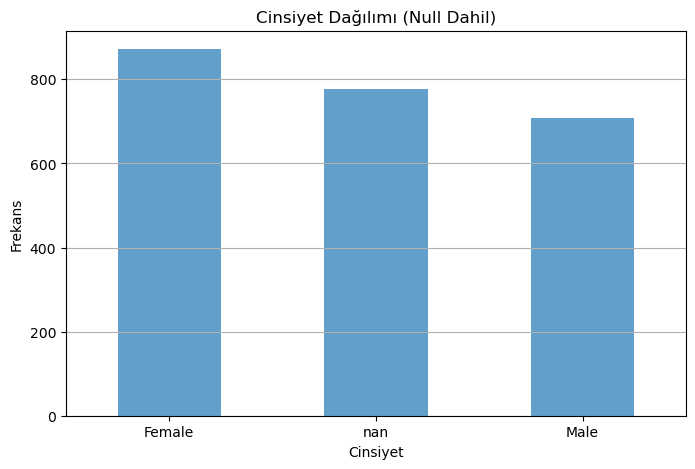

In [10]:
def plot_gender_distribution(df, column_name):
    # Cinsiyetlerin frekansını hesapla
    counts = df[column_name].value_counts(dropna=False)
    
    # Bar grafiği oluştur
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', alpha=0.7)
    plt.title('Cinsiyet Dağılımı (Null Dahil)')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Frekans')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Fonksiyonu çağır
plot_gender_distribution(df, "Cinsiyet")


# Yan Etkilerin Dağılımları

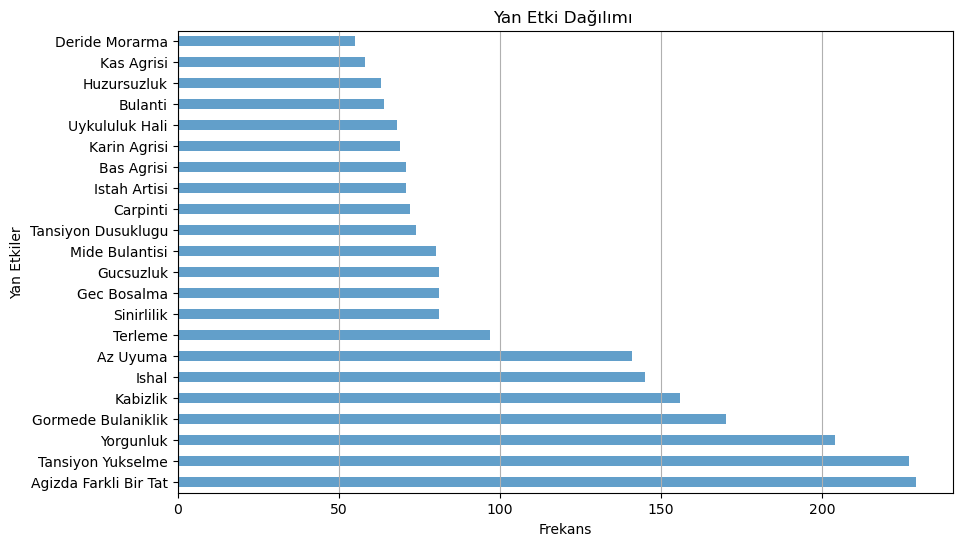

In [11]:
def plot_side_effect_distribution(df, column_name):
    # Yan etkilerin frekansını hesapla
    counts = df[column_name].value_counts(dropna=False)
    
    # Yatay bar grafiği oluştur
    plt.figure(figsize=(10, 6))
    counts.plot(kind='barh', alpha=0.7)
    plt.title('Yan Etki Dağılımı ')
    plt.xlabel('Frekans')
    plt.ylabel('Yan Etkiler')
    plt.grid(axis='x')
    plt.show()

# Fonksiyonu çağır
plot_side_effect_distribution(df, "Yan_Etki")


# Yaşı En küçük ve En büyük Kişiler ile Yaş Dağılımları

En Küçük Yaş: 13
En Büyük Yaş: 84


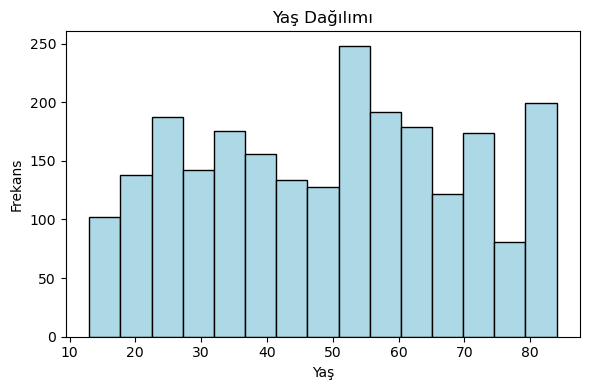

In [12]:
def add_age_and_plot_distribution(df, birth_date_column):
    # Doğum tarihini datetime formatına çevir
    df[birth_date_column] = pd.to_datetime(df[birth_date_column], errors='coerce')

    # Yaşı hesapla ve yeni bir kolon olarak ekle, tam sayı olarak
    df['Age'] = ((pd.Timestamp.today() - df[birth_date_column]).dt.days / 365.25).astype(int)

    # En küçük ve en büyük yaşı yazdır
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    print(f"En Küçük Yaş: {min_age}")
    print(f"En Büyük Yaş: {max_age}")

    # Yaş dağılımını çiz
    plt.figure(figsize=(6, 4))
    df['Age'].plot(kind='hist', bins=15, color='lightblue', edgecolor='black')
    plt.title('Yaş Dağılımı')
    plt.xlabel('Yaş')
    plt.ylabel('Frekans')
    plt.tight_layout()
    plt.show()

# Fonksiyonu çağır
add_age_and_plot_distribution(df, 'Dogum_Tarihi')


# Yaş dağılımı Yan Etkiye nası bir etkide bulunmuş

<Figure size 1500x1000 with 0 Axes>

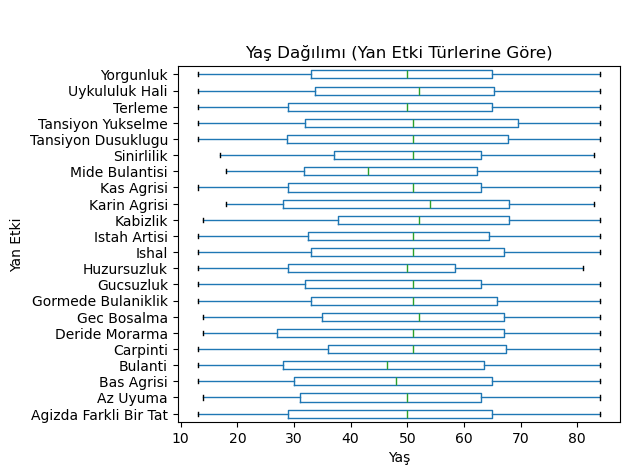

In [13]:
def plot_boxplot_age_by_side_effect(df, side_effect_column):
    plt.figure(figsize=(15, 10))
    
    # Kutu grafiğini oluştur
    df.boxplot(column='Age', by=side_effect_column, grid=False, vert=False)
    
    plt.title('Yaş Dağılımı (Yan Etki Türlerine Göre)')
    plt.suptitle(" ")
    plt.xlabel('Yaş')
    plt.ylabel('Yan Etki')
    plt.tight_layout()
    
    plt.show()

# Fonksiyonu çağır
plot_boxplot_age_by_side_effect(df, 'Yan_Etki')


# En çok Yan Etkiye sahip 20 ilaç

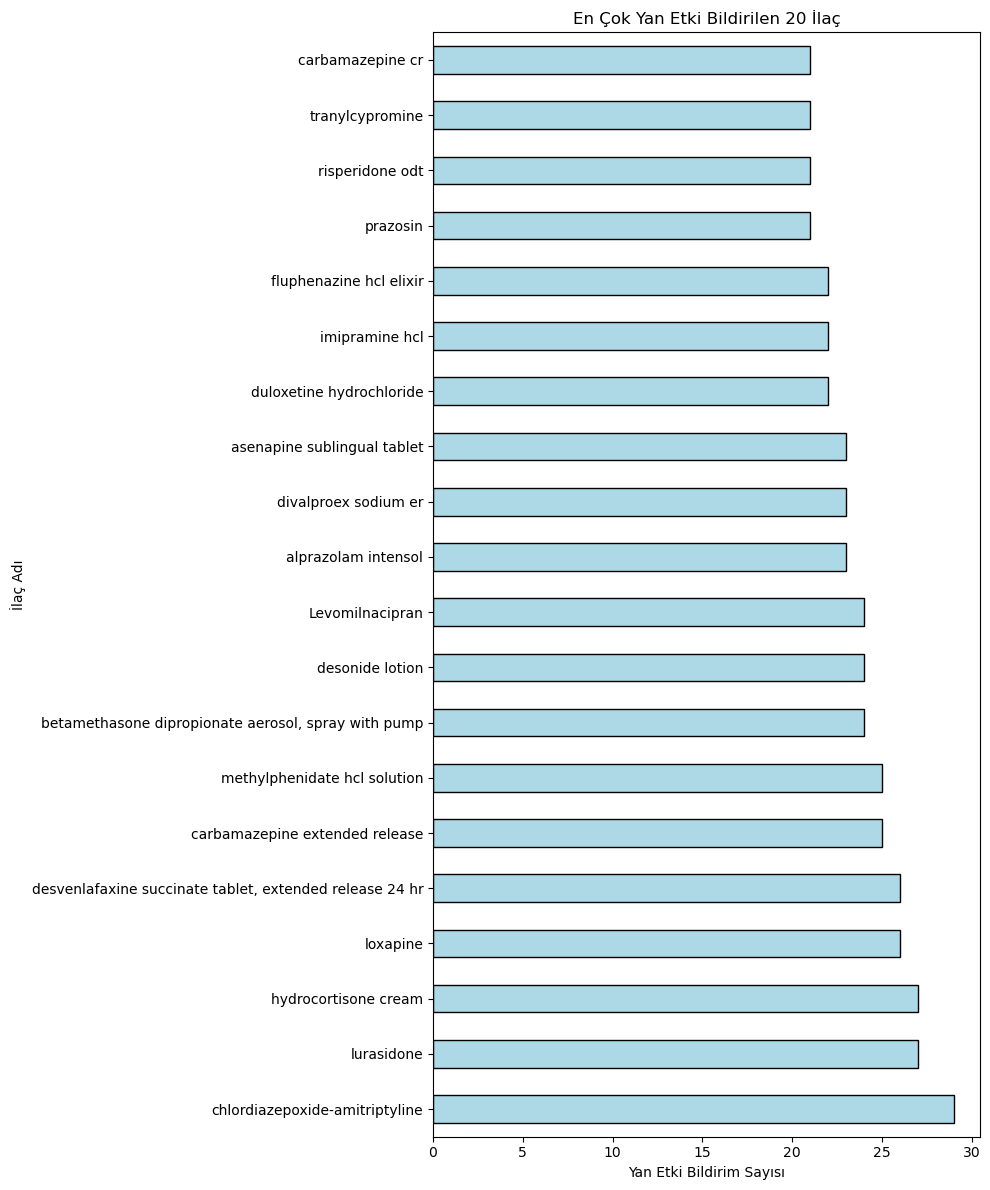

In [14]:
def plot_top_drugs_by_side_effect(df, drug_column, side_effect_column, top_n=20):
    # Her ilacın yan etki bildirim sayısını hesapla
    top_drugs = df[drug_column].value_counts().head(top_n)

    # Y ekseninde çubuk grafiğini oluştur
    plt.figure(figsize=(10, 12))
    top_drugs.plot(kind='barh', color='lightblue', edgecolor='black')
    
    plt.title(f'En Çok Yan Etki Bildirilen {top_n} İlaç')
    plt.xlabel('Yan Etki Bildirim Sayısı')
    plt.ylabel('İlaç Adı')
    plt.tight_layout()
    
    plt.show()

# Fonksiyonu çağır
plot_top_drugs_by_side_effect(df, 'Ilac_Adi', 'Yan_Etki')


# Cinsiyete Göre Yan Etki Dağılımı

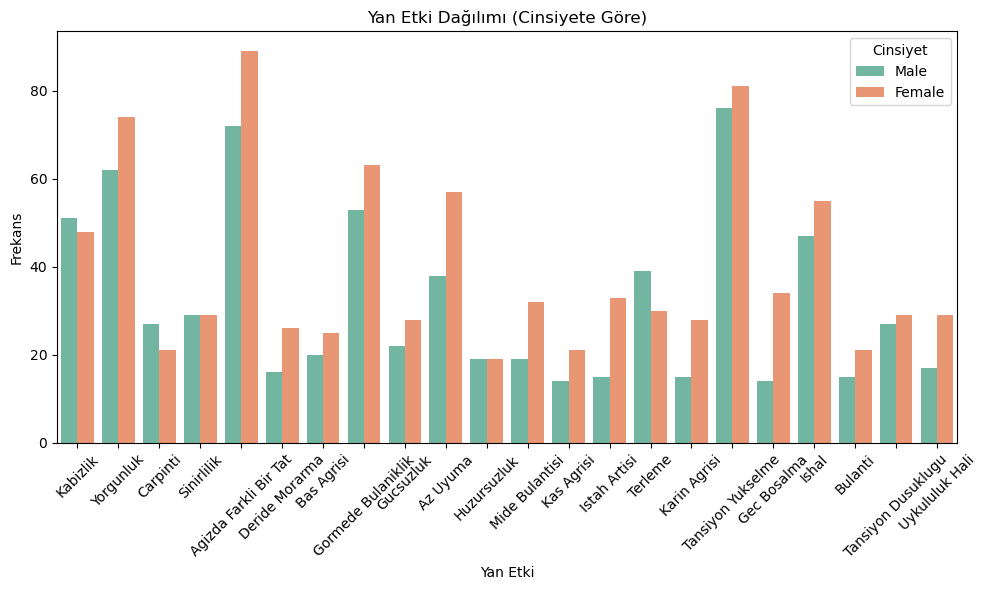

In [15]:
def plot_side_effects_by_gender(df, side_effect_column, gender_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=side_effect_column, hue=gender_column, palette='Set2')
    plt.title('Yan Etki Dağılımı (Cinsiyete Göre)')
    plt.xlabel('Yan Etki')
    plt.ylabel('Frekans')
    plt.xticks(rotation=45)
    plt.legend(title=gender_column)
    plt.tight_layout()
    plt.show()

# Fonksiyonu çağır
plot_side_effects_by_gender(df, 'Yan_Etki', 'Cinsiyet')


# Testler

In [16]:
from scipy.stats import chi2_contingency

def chi_square_test(df, variable_column):
    contingency_table = pd.crosstab(df['Yan_Etki'], df[variable_column])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    
    print(f"{variable_column} için Chi-Square Statistic: {chi2_stat:.2f}")
    print(f"{variable_column} için P-Value: {p_val:.4f}\n")

# Değişkenler listesi
variables = ['Cinsiyet', 'Boy', 'Kilo', 'Age']



# Kategorik değişkenler için chi-square testi yap
for var in variables:
    chi_square_test(df, var)


Cinsiyet için Chi-Square Statistic: 24.93
Cinsiyet için P-Value: 0.2501

Boy için Chi-Square Statistic: 861.79
Boy için P-Value: 0.2934

Kilo için Chi-Square Statistic: 1090.80
Kilo için P-Value: 0.9111

Age için Chi-Square Statistic: 1412.34
Age için P-Value: 0.6109



#  LabelEncoder() ile sayısallaştırma ve Verilerden Yeni Hesaplamalar ile Yeni Veriler Türetilmesi

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Örnek verilerinizi kullanarak hastalıkları ayır
def split_diseases(dataframe, column):
    return dataframe[column].str.split(',', expand=True).stack().reset_index(drop=True)

# Tüm hastalıkların listesini oluştur
all_diseases = []
for column in ["Kronik Hastaliklarim", "Baba Kronik Hastaliklari", 
               "Anne Kronik Hastaliklari", "Kiz Kardes Kronik Hastaliklari", 
               "Erkek Kardes Kronik Hastaliklari"]:
    diseases = split_diseases(df, column)
    all_diseases.extend(diseases.dropna().unique())

# Label Encoder
label_encoder = LabelEncoder()
label_encoder.fit(all_diseases)

# Yeni kolonlar ekleyelim
for column in ["Kronik Hastaliklarim", "Baba Kronik Hastaliklari", 
               "Anne Kronik Hastaliklari", "Kiz Kardes Kronik Hastaliklari", 
               "Erkek Kardes Kronik Hastaliklari"]:
    # Her hastalık için kodlama yap ve yeni kolon ekle
    df[column + "_encoded"] = df[column].apply(lambda x: label_encoder.transform(x.split(',')) if pd.notnull(x) else [])




In [18]:
df.head()


,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Kan Grubu,Kilo,Boy,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,...,B RH-,103.0,191.0,18,64,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]"
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,...,NaN,81.0,181.0,20,84,[],"[16, 3]","[17, 8]",[0],"[18, 4]"
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,...,B RH-,93.0,158.0,5,47,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14]
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,...,AB RH-,NaN,165.0,1,47,"[15, 3]","[19, 3]",[],[13],"[19, 10]"
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,...,AB RH-,99.0,172.0,5,48,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]"


# Yan etki verisinden Yan Etkinin Saatini ve Kaç Günde Oluştuğu Bilgisi

In [19]:
def add_side_effect_columns(dataframe):
    # Yan Etki Saatini Hesapla
    dataframe['Yan_Etki_Saati'] = dataframe['Yan_Etki_Bildirim_Tarihi'].dt.hour

    # Yan Etki Süresini (Gün) Hesapla
    dataframe['Yan_Etki_Kac_Gun'] = (dataframe['Yan_Etki_Bildirim_Tarihi'] - dataframe['Ilac_Baslangic_Tarihi']).dt.days

    return dataframe

# Fonksiyonu uygulamak için
df = add_side_effect_columns(df)

# Boy Kilo Bilgilerindeki boşlukların Ortalama ile doldurulması ve Vücut Kütle İndeksi Hesaplaması

In [20]:
def analyze_and_fill_bmi(dataframe):
    # Boy ve Kilo için null değerlerin sayısını yazdır
    null_boy = dataframe['Boy'].isnull().sum()
    null_kilo = dataframe['Kilo'].isnull().sum()
    print(f"Null değer sayısı - Boy: {null_boy}, Kilo: {null_kilo}")

    # Boy ve Kilo için temel istatistikleri yazdır
    print("Boy istatistikleri:")
    print(dataframe['Boy'].describe())
    print("Kilo istatistikleri:")
    print(dataframe['Kilo'].describe())

    # Null değerleri ortalama ile doldur
    dataframe['Boy'].fillna(dataframe['Boy'].mean(), inplace=True)
    dataframe['Kilo'].fillna(dataframe['Kilo'].mean(), inplace=True)

    # Vücut Kütle İndeksi (VKİ) hesapla
    dataframe['VKİ'] = dataframe['Kilo'] / ((dataframe['Boy'] / 100) ** 2)  # Boyu m cinsine çevirip VKİ'yi hesapla
    
    return dataframe

# Fonksiyonu uygulamak için
df = analyze_and_fill_bmi(df)


Null değer sayısı - Boy: 114, Kilo: 293
Boy istatistikleri:
count    2243.000000
mean      174.638431
std        16.516552
min       145.000000
25%       160.000000
50%       176.000000
75%       187.000000
max       203.000000
Name: Boy, dtype: float64
Kilo istatistikleri:
count    2064.000000
mean       80.863857
std        18.635269
min        50.000000
25%        65.000000
50%        83.000000
75%        96.000000
max       110.000000
Name: Kilo, dtype: float64


In [21]:
df['Kilo'].max()

110.0

 # Genel Histogramlara Bakış

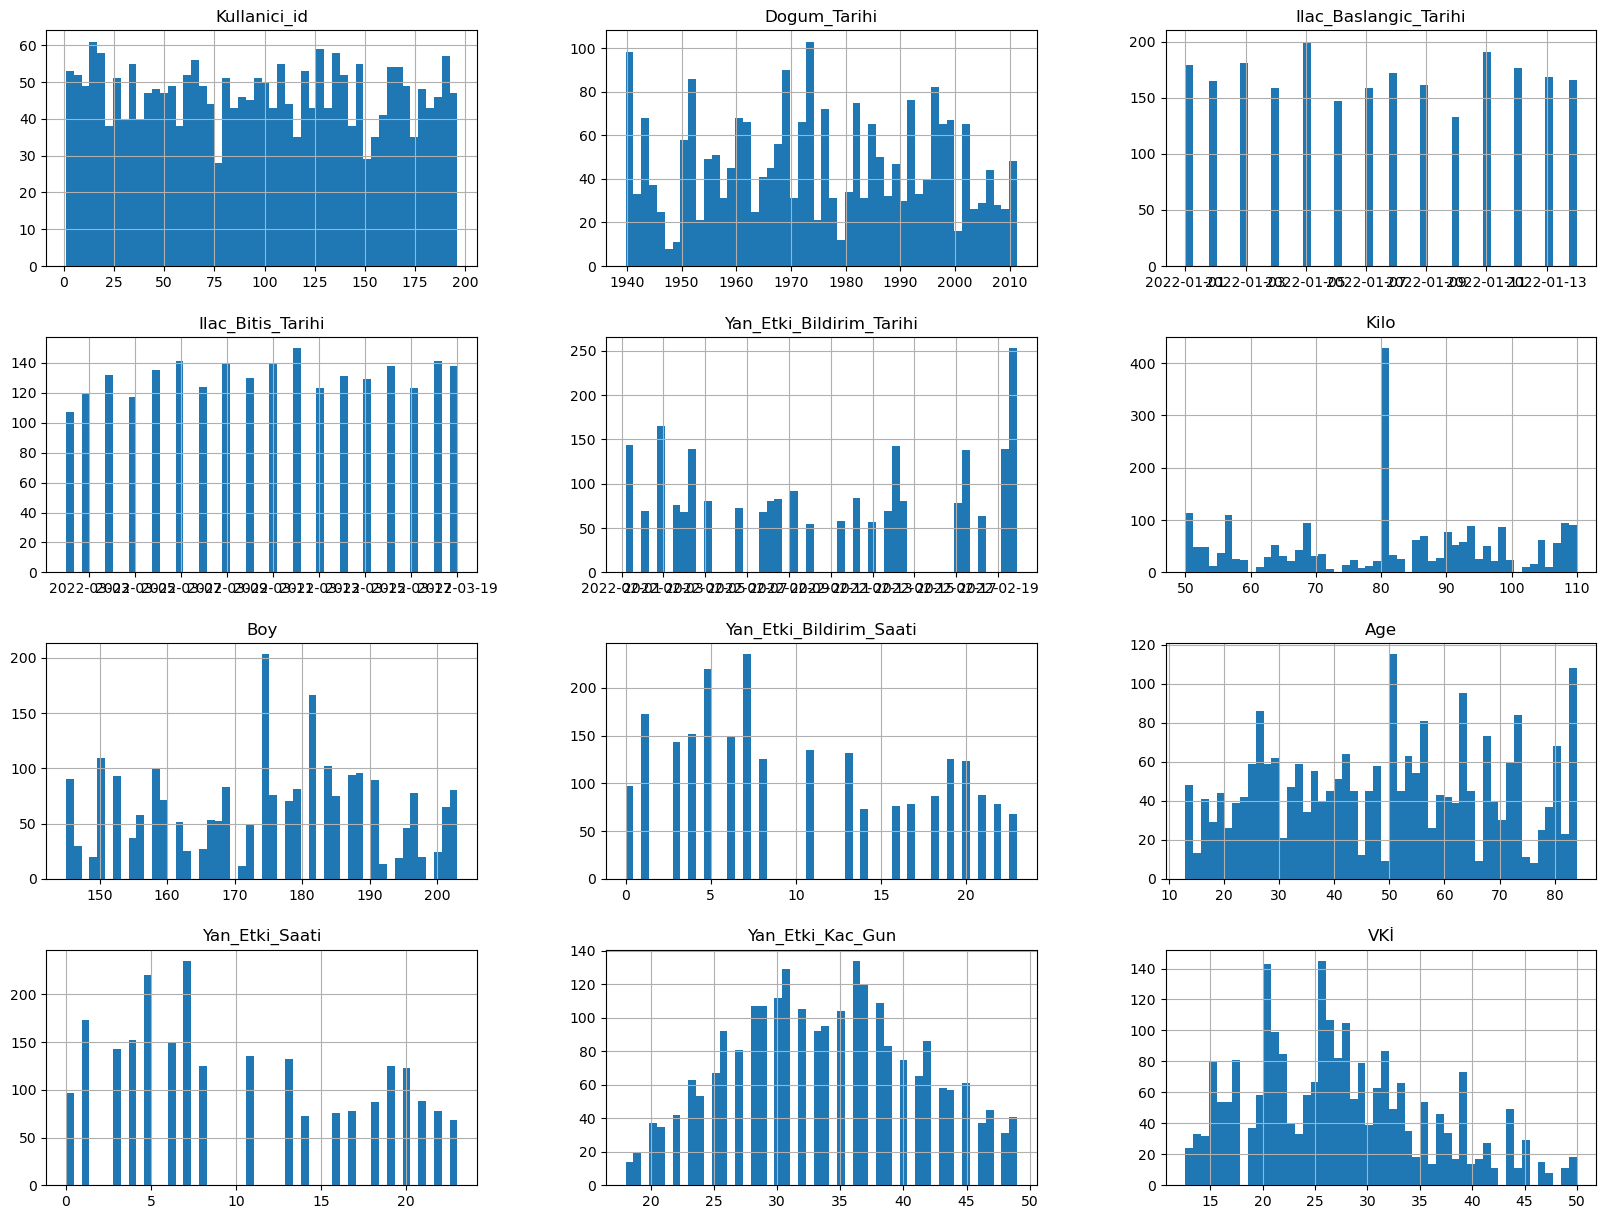

In [22]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [23]:
df

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,...,18,64,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]",18,41,28.233875
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,...,20,84,[],"[16, 3]","[17, 8]",[0],"[18, 4]",20,25,24.724520
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,...,5,47,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14],5,24,37.253645
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,...,1,47,"[15, 3]","[19, 3]",[],[13],"[19, 10]",1,35,29.702059
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,...,5,48,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]",5,30,33.464035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,...,19,67,[],[0],"[13, 5]",[0],"[18, 9]",19,30,21.641274
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,...,17,19,[],"[17, 2]","[13, 11]","[18, 9]","[13, 4]",17,48,25.521985
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,...,20,72,"[16, 7]","[12, 3]",[],"[13, 4]","[19, 3]",20,32,21.839889
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,...,5,44,"[12, 3]",[],"[19, 3]","[21, 7]","[13, 7]",5,33,26.583176


# Bazı kolonların etki etmediğini düşündüğüm için kaldırdım. Etki edecekler için sayısallaştırma uygulamıştım.

In [24]:
df = df.drop(columns=['Uyruk', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi' ])
df = df.drop(columns=['Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 
                      'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 
                      'Erkek Kardes Kronik Hastaliklari','Dogum_Tarihi'] )


In [25]:
df

,Kullanici_id,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kan Grubu,Kilo,Boy,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,107,Male,Canakkale,trifluoperazine,Kabizlik,Ceviz,B RH-,103.000000,191.0,18,64,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]",18,41,28.233875
1,140,Male,Trabzon,fluphenazine hcl,Yorgunluk,Toz,NaN,81.000000,181.0,20,84,[],"[16, 3]","[17, 8]",[0],"[18, 4]",20,25,24.724520
2,2,Female,Canakkale,warfarin sodium,Carpinti,Muz,B RH-,93.000000,158.0,5,47,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14],5,24,37.253645
3,83,Male,Adana,valproic acid,Sinirlilik,Pancar,AB RH-,80.863857,165.0,1,47,"[15, 3]","[19, 3]",[],[13],"[19, 10]",1,35,29.702059
4,7,Female,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,NaN,AB RH-,99.000000,172.0,5,48,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]",5,30,33.464035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,NaN,NaN,"desoximetasone spray, non-aerosol",Ishal,Ispanakgiller,NaN,50.000000,152.0,19,67,[],[0],"[13, 5]",[0],"[18, 9]",19,30,21.641274
2353,101,Female,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,Istiridye,AB RH-,80.863857,178.0,17,19,[],"[17, 2]","[13, 11]","[18, 9]","[13, 4]",17,48,25.521985
2354,127,Female,Mersin,trazodone,Yorgunluk,Deniz Urunler,B RH+,90.000000,203.0,20,72,"[16, 7]","[12, 3]",[],"[13, 4]","[19, 3]",20,32,21.839889
2355,178,Male,Kayseri,duloxetine hydrochloride,Carpinti,Sari Kantaron,NaN,90.000000,184.0,5,44,"[12, 3]",[],"[19, 3]","[21, 7]","[13, 7]",5,33,26.583176


In [26]:
label_encoder = LabelEncoder()
df['Cinsiyet'] = label_encoder.fit_transform(df['Cinsiyet'])

In [27]:
df

,Kullanici_id,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kan Grubu,Kilo,Boy,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,107,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,B RH-,103.000000,191.0,18,64,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]",18,41,28.233875
1,140,1,Trabzon,fluphenazine hcl,Yorgunluk,Toz,NaN,81.000000,181.0,20,84,[],"[16, 3]","[17, 8]",[0],"[18, 4]",20,25,24.724520
2,2,0,Canakkale,warfarin sodium,Carpinti,Muz,B RH-,93.000000,158.0,5,47,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14],5,24,37.253645
3,83,1,Adana,valproic acid,Sinirlilik,Pancar,AB RH-,80.863857,165.0,1,47,"[15, 3]","[19, 3]",[],[13],"[19, 10]",1,35,29.702059
4,7,0,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,NaN,AB RH-,99.000000,172.0,5,48,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]",5,30,33.464035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,2,NaN,"desoximetasone spray, non-aerosol",Ishal,Ispanakgiller,NaN,50.000000,152.0,19,67,[],[0],"[13, 5]",[0],"[18, 9]",19,30,21.641274
2353,101,0,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,Istiridye,AB RH-,80.863857,178.0,17,19,[],"[17, 2]","[13, 11]","[18, 9]","[13, 4]",17,48,25.521985
2354,127,0,Mersin,trazodone,Yorgunluk,Deniz Urunler,B RH+,90.000000,203.0,20,72,"[16, 7]","[12, 3]",[],"[13, 4]","[19, 3]",20,32,21.839889
2355,178,1,Kayseri,duloxetine hydrochloride,Carpinti,Sari Kantaron,NaN,90.000000,184.0,5,44,"[12, 3]",[],"[19, 3]","[21, 7]","[13, 7]",5,33,26.583176


# Alerjilerimde eksik veri olduğu için 'Yok' ile dolduracağım.

In [28]:
def fill_missing_allergies(df):
    # Alerjilerim sütunundaki NaN değerleri 'Yok' ile doldur
    df['Alerjilerim'].fillna('Yok', inplace=True)
    return df

df = fill_missing_allergies(df)


# Kan Grubu önemli bir kolon hata durumunda kötü sonuçlar doğurur. Bu yüzden veri olmayanları direk sileceğim.

In [29]:
def drop_missing_blood_type(df):
    # Kan Grubu sütununda NaN olan satırları sil
    df_cleaned = df.dropna(subset=['Kan Grubu']).reset_index(drop=True)
    return df_cleaned

df = drop_missing_blood_type(df)

In [30]:
df

,Kullanici_id,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kan Grubu,Kilo,Boy,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,107,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,B RH-,103.000000,191.0,18,64,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]",18,41,28.233875
1,2,0,Canakkale,warfarin sodium,Carpinti,Muz,B RH-,93.000000,158.0,5,47,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14],5,24,37.253645
2,83,1,Adana,valproic acid,Sinirlilik,Pancar,AB RH-,80.863857,165.0,1,47,"[15, 3]","[19, 3]",[],[13],"[19, 10]",1,35,29.702059
3,7,0,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,AB RH-,99.000000,172.0,5,48,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]",5,30,33.464035
4,131,1,NaN,fluoxetine dr,Agizda Farkli Bir Tat,Yok,AB RH-,66.000000,150.0,8,42,"[15, 6]",[],"[12, 8]",[21],"[15, 11]",8,28,29.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,153,2,Adana,trifluoperazine,Istah Artisi,Deniz Urunler,B RH-,77.000000,149.0,7,49,"[17, 8]",[22],"[13, 6]","[15, 2]","[15, 11]",7,41,34.683122
2006,104,0,Istanbul,vortioxetine,Ishal,Kahve,A RH-,79.000000,191.0,19,57,"[18, 6]","[19, 10]","[19, 2]","[19, 2]","[15, 2]",19,41,21.655108
2007,101,0,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,Istiridye,AB RH-,80.863857,178.0,17,19,[],"[17, 2]","[13, 11]","[18, 9]","[13, 4]",17,48,25.521985
2008,127,0,Mersin,trazodone,Yorgunluk,Deniz Urunler,B RH+,90.000000,203.0,20,72,"[16, 7]","[12, 3]",[],"[13, 4]","[19, 3]",20,32,21.839889


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Kullanici_id                              2010 non-null   int64  
 1   Cinsiyet                                  2010 non-null   int32  
 2   Il                                        1809 non-null   object 
 3   Ilac_Adi                                  2010 non-null   object 
 4   Yan_Etki                                  2010 non-null   object 
 5   Alerjilerim                               2010 non-null   object 
 6   Kan Grubu                                 2010 non-null   object 
 7   Kilo                                      2010 non-null   float64
 8   Boy                                       2010 non-null   float64
 9   Yan_Etki_Bildirim_Saati                   2010 non-null   int32  
 10  Age                                 

# Cinsiyet kısmında eksik verileri ortalama değerler ile doldurmak doğru olmaz. Fakat bu kolon için bir makine öğrenmesi modeli geliştirilip Boy ve Kilo kolonlarına bağlı olarak tahminleme yapılabilir. Fiziksel olarak erkek ve kadını bu iki türden istisnalar dışında bir başarıya kadar tahmin edebilmek mümkün. Task kapsamında olmadığı için devam ettirmiyorum.

In [32]:
df


,Kullanici_id,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kan Grubu,Kilo,Boy,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,107,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,B RH-,103.000000,191.0,18,64,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]",18,41,28.233875
1,2,0,Canakkale,warfarin sodium,Carpinti,Muz,B RH-,93.000000,158.0,5,47,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14],5,24,37.253645
2,83,1,Adana,valproic acid,Sinirlilik,Pancar,AB RH-,80.863857,165.0,1,47,"[15, 3]","[19, 3]",[],[13],"[19, 10]",1,35,29.702059
3,7,0,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,AB RH-,99.000000,172.0,5,48,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]",5,30,33.464035
4,131,1,NaN,fluoxetine dr,Agizda Farkli Bir Tat,Yok,AB RH-,66.000000,150.0,8,42,"[15, 6]",[],"[12, 8]",[21],"[15, 11]",8,28,29.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,153,2,Adana,trifluoperazine,Istah Artisi,Deniz Urunler,B RH-,77.000000,149.0,7,49,"[17, 8]",[22],"[13, 6]","[15, 2]","[15, 11]",7,41,34.683122
2006,104,0,Istanbul,vortioxetine,Ishal,Kahve,A RH-,79.000000,191.0,19,57,"[18, 6]","[19, 10]","[19, 2]","[19, 2]","[15, 2]",19,41,21.655108
2007,101,0,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,Istiridye,AB RH-,80.863857,178.0,17,19,[],"[17, 2]","[13, 11]","[18, 9]","[13, 4]",17,48,25.521985
2008,127,0,Mersin,trazodone,Yorgunluk,Deniz Urunler,B RH+,90.000000,203.0,20,72,"[16, 7]","[12, 3]",[],"[13, 4]","[19, 3]",20,32,21.839889


In [33]:
from sklearn.preprocessing import StandardScaler

# Ölçeklendirilecek sayısal sütunları belirle
columns_to_scale = ['Kilo', 'Boy', 'Age', 'Yan_Etki_Saati', 'Yan_Etki_Kac_Gun', 'VKİ']

# StandardScaler kullanarak bu sütunları ölçeklendirme
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Ölçeklendirilmiş verilerin ilk 5 satırını gösterme
df[columns_to_scale].head(5)


,Kilo,Boy,Age,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,1.284039,1.012435,0.723278,1.121279,0.966882,0.103457
1,0.698850,-1.019359,-0.122845,-0.736617,-1.335602,1.215427
2,-0.011345,-0.588372,-0.122845,-1.308277,0.154240,0.284456
3,1.049963,-0.157386,-0.073073,-0.736617,-0.522961,0.748238
4,-0.881161,-1.511915,-0.371705,-0.307872,-0.793841,0.238999


In [34]:
df

,Kullanici_id,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kan Grubu,Kilo,Boy,Yan_Etki_Bildirim_Saati,Age,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Yan_Etki_Saati,Yan_Etki_Kac_Gun,VKİ
0,107,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,B RH-,1.284039,1.012435,18,0.723278,"[17, 9]","[16, 6]",[18],"[22, 8]","[22, 5]",1.121279,0.966882,0.103457
1,2,0,Canakkale,warfarin sodium,Carpinti,Muz,B RH-,0.698850,-1.019359,5,-0.122845,"[19, 4]","[15, 7]","[22, 4]","[15, 11]",[14],-0.736617,-1.335602,1.215427
2,83,1,Adana,valproic acid,Sinirlilik,Pancar,AB RH-,-0.011345,-0.588372,1,-0.122845,"[15, 3]","[19, 3]",[],[13],"[19, 10]",-1.308277,0.154240,0.284456
3,7,0,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,AB RH-,1.049963,-0.157386,5,-0.073073,"[15, 8]","[12, 6]","[20, 11]","[15, 3]","[12, 6]",-0.736617,-0.522961,0.748238
4,131,1,NaN,fluoxetine dr,Agizda Farkli Bir Tat,Yok,AB RH-,-0.881161,-1.511915,8,-0.371705,"[15, 6]",[],"[12, 8]",[21],"[15, 11]",-0.307872,-0.793841,0.238999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,153,2,Adana,trifluoperazine,Istah Artisi,Deniz Urunler,B RH-,-0.237453,-1.573484,7,-0.023301,"[17, 8]",[22],"[13, 6]","[15, 2]","[15, 11]",-0.450787,0.966882,0.898529
2006,104,0,Istanbul,vortioxetine,Ishal,Kahve,A RH-,-0.120415,1.012435,19,0.374874,"[18, 6]","[19, 10]","[19, 2]","[19, 2]","[15, 2]",1.264194,0.966882,-0.707583
2007,101,0,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,Istiridye,AB RH-,-0.011345,0.212032,17,-1.516460,[],"[17, 2]","[13, 11]","[18, 9]","[13, 4]",0.978364,1.914963,-0.230869
2008,127,0,Mersin,trazodone,Yorgunluk,Deniz Urunler,B RH+,0.523293,1.751269,20,1.121454,"[16, 7]","[12, 3]",[],"[13, 4]","[19, 3]",1.407109,-0.252081,-0.684803


In [37]:
# 'new_data.xlsx' olarak kaydetmek için pandas kullanarak dataframe'i Excel'e yazdır
df.to_excel(r"C:\Users\bayra\OneDrive\Masaüstü\Pusula\dataset\dataset.xlsx", index=False)
